## TP3 part 01- Implementation of an MLP architecture using Keras on MNIST dataset

In [1]:
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical, plot_model
import time

2024-03-12 06:02:59.206325: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 06:02:59.289483: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 06:02:59.505345: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 06:02:59.505466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 06:02:59.519017: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

# 1- Load and preprocess (data normalization) the MNIST dataset.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

<h3> Data visualization </h3>

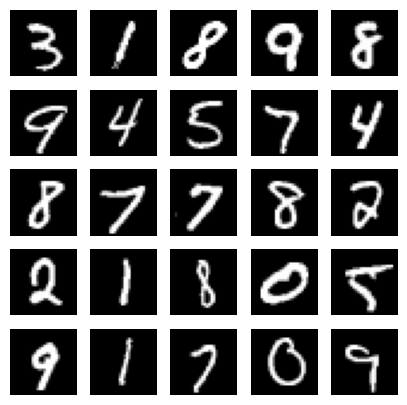

In [5]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

<h3> Reshape data + normalization </h3>

In [6]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [7]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255


In [8]:
x_train.shape

(60000, 784)

# 2- Split the train set into Train and validations sets (20% for validation).

In [9]:
# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [10]:
x_train.shape

(48000, 784)

In [11]:
x_val.shape

(12000, 784)

In [12]:
x_test.shape

(10000, 784)

<h3> 3- Design an MLP architecture, with  one input layer, two hidden layers (128, 64 neurons) and one fully connected layer. Use
the RELU activation function for hidden layers and the softmax for the fully
connected layer. Use the cross-entropy loss function. </h3>

In [13]:
mini_batch_sgd_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,  activation='softmax')
])

In [14]:
mini_batch_sgd_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h3> Train the designed architecture based on SGD, Mini batch SGD (64 the size batch) </h3>

<h3> mini batch SGD </h3>

In [36]:
mini_batch_sgd_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [37]:
start_time = time.time()
history_sgd_mini_batch = mini_batch_sgd_model .fit(x_train, y_train, epochs=50, batch_size=64,  validation_data=(x_val,y_val), shuffle=True)
end_time = time.time()
mini_batch_sgd_model_training_time = end_time - start_time
print(f"Running time for mini batch sgd : {mini_batch_sgd_model_training_time} seconds")

Epoch 1/50
750/750 [==============================] - 4s 5ms/step - loss: 0.9818 - accuracy: 0.7475 - val_loss: 0.4645 - val_accuracy: 0.8708
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3997 - accuracy: 0.8896 - val_loss: 0.3465 - val_accuracy: 0.9010
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3282 - accuracy: 0.9061 - val_loss: 0.3042 - val_accuracy: 0.9129
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2922 - accuracy: 0.9166 - val_loss: 0.2775 - val_accuracy: 0.9218
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2668 - accuracy: 0.9242 - val_loss: 0.2588 - val_accuracy: 0.9271
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2470 - accuracy: 0.9298 - val_loss: 0.2415 - val_accuracy: 0.9312
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2304 - accuracy: 0.9345 - val_loss: 0.2271 - val_accuracy: 0.9356
Epoch 

<h3> define a function for plotting the curves for each model </h3>

In [38]:

def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 4))
    
    
    plt.subplot(1, 2, 1)
    plt.plot( history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title + ' - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot( history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title + ' - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

<h3>Plot the learning curves for mini batch strategy (batch size = 64) </h3>

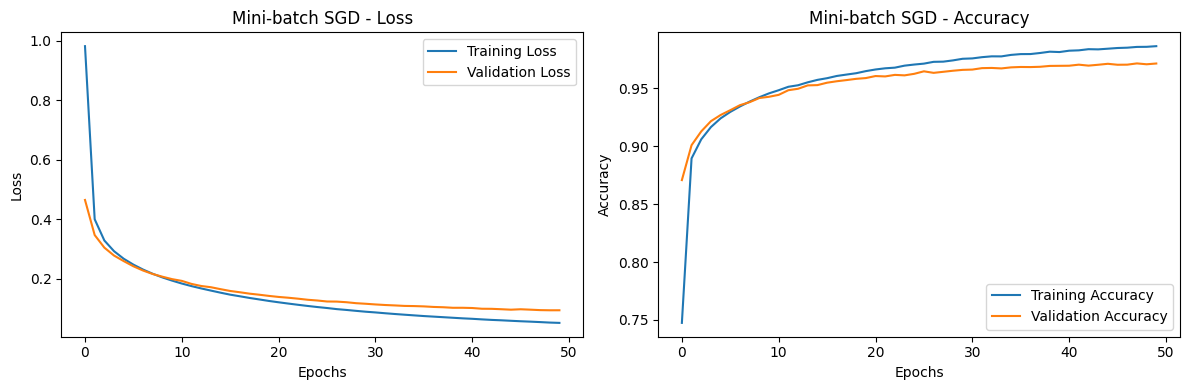

In [39]:
plot_learning_curves(history_sgd_mini_batch, 'Mini-batch SGD')

<h3> Train the designed architecture based on SGD, On batch SGD (entire training set)</h3>

<h3>BATCH SGD </h3>

In [40]:
batch_sgd_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,  activation='softmax')
])

In [41]:
batch_sgd_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [42]:
start_time = time.time()
history_sgd_batch = batch_sgd_model.fit(x_train, y_train, epochs=50, validation_data=(x_val,y_val))
end_time = time.time()
batch_sgd_model_training_time = end_time - start_time
print(f"Running time for batch sgd : {batch_sgd_model_training_time} seconds")

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7234 - accuracy: 0.8110 - val_loss: 0.3573 - val_accuracy: 0.9003
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3109 - accuracy: 0.9108 - val_loss: 0.2750 - val_accuracy: 0.9218
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2565 - accuracy: 0.9264 - val_loss: 0.2456 - val_accuracy: 0.9302
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2236 - accuracy: 0.9366 - val_loss: 0.2148 - val_accuracy: 0.9377
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1988 - accuracy: 0.9439 - val_loss: 0.2012 - val_accuracy: 0.9397
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1796 - accuracy: 0.9495 - val_loss: 0.1781 - val_accuracy: 0.9485
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1629 - accuracy: 0.9531 - val_loss: 0.1693 - val_accuracy:

<h3>Plot the learning curves for  batch strategy  </h3>

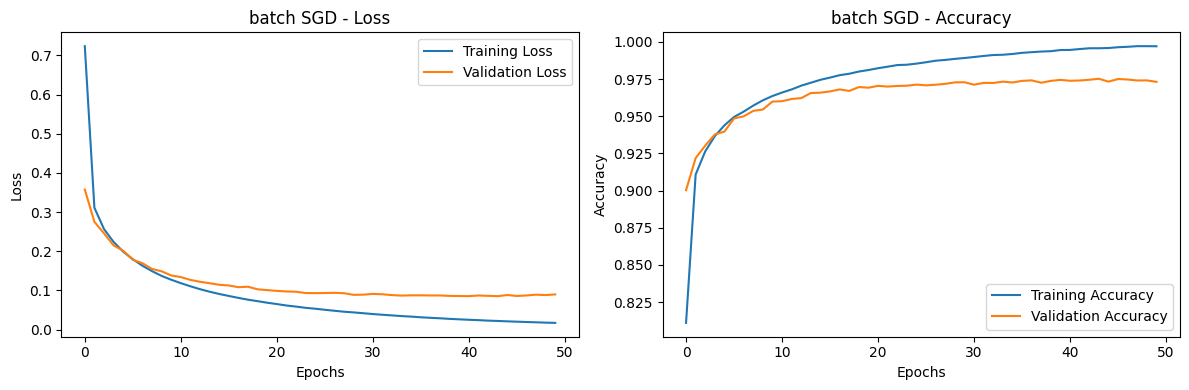

In [43]:
plot_learning_curves(history_sgd_batch, 'batch SGD')

<h3> SGD (on one random sample) </h3>

In [44]:
sgd_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,  activation='softmax')
])

In [45]:
sgd_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [46]:
start_time = time.time()
history_sgd = sgd_model.fit(x_train, y_train, epochs=50, batch_size=1,shuffle=True, validation_data=(x_val,y_val))
end_time = time.time()
sgd_model_training_time = end_time - start_time
print(f"Running time for sgd : {sgd_model_training_time} seconds")

Epoch 1/50
48000/48000 [==============================] - 181s 4ms/step - loss: 0.2461 - accuracy: 0.9252 - val_loss: 0.1325 - val_accuracy: 0.9589
Epoch 2/50
48000/48000 [==============================] - 166s 3ms/step - loss: 0.1137 - accuracy: 0.9644 - val_loss: 0.1176 - val_accuracy: 0.9643
Epoch 3/50
48000/48000 [==============================] - 132s 3ms/step - loss: 0.0828 - accuracy: 0.9738 - val_loss: 0.1010 - val_accuracy: 0.9700
Epoch 4/50
48000/48000 [==============================] - 138s 3ms/step - loss: 0.0657 - accuracy: 0.9791 - val_loss: 0.1394 - val_accuracy: 0.9600
Epoch 5/50
48000/48000 [==============================] - 133s 3ms/step - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.1257 - val_accuracy: 0.9675
Epoch 6/50
48000/48000 [==============================] - 129s 3ms/step - loss: 0.0423 - accuracy: 0.9861 - val_loss: 0.1129 - val_accuracy: 0.9702
Epoch 7/50
48000/48000 [==============================] - 132s 3ms/step - loss: 0.0393 - accuracy: 0.9870 - val_

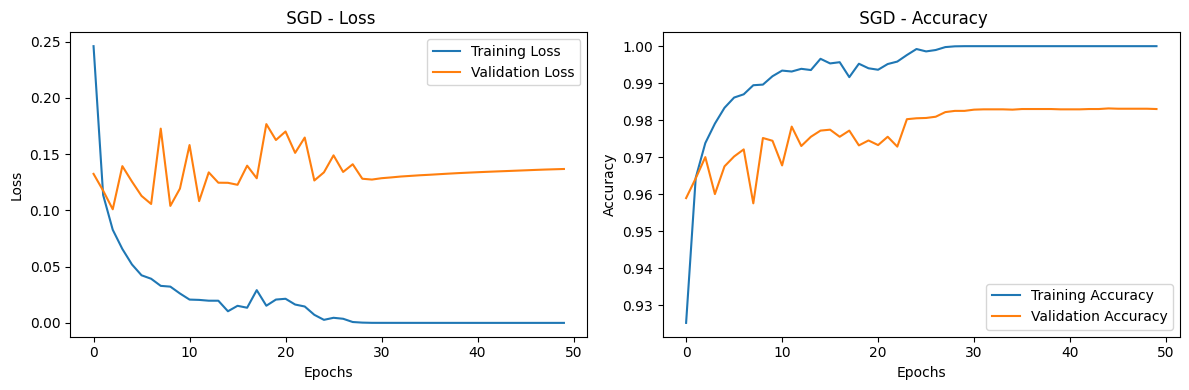

In [47]:
plot_learning_curves(history_sgd, ' SGD')

<h3> 5- Compare between the training time and the learning curves of mini batch SGD,
mini batch SGD with decay (1e-6) and SGD with decay (1e-6) and momentum. </h3>

<h3> Train the designed architecture on based on SGD, on mini batch SGD with decay (1e-6) </h3>

In [48]:
mini_batch_sgd_decay_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,  activation='softmax')
])

In [49]:
mini_batch_sgd_decay_model.compile(
     optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-6),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'],
)

In [50]:
start_time = time.time()
history_sgd_mini_batch_decay = mini_batch_sgd_decay_model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val,y_val), shuffle=True)
end_time = time.time()
sgd_mini_batch_decay_model_training_time = end_time - start_time
print(f"Running time for mini batch sgd with decay: {sgd_mini_batch_decay_model_training_time} seconds")

Epoch 1/50
750/750 [==============================] - 3s 4ms/step - loss: 1.0204 - accuracy: 0.7257 - val_loss: 0.4844 - val_accuracy: 0.8742
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4045 - accuracy: 0.8902 - val_loss: 0.3515 - val_accuracy: 0.9017
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3292 - accuracy: 0.9071 - val_loss: 0.3069 - val_accuracy: 0.9133
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2930 - accuracy: 0.9172 - val_loss: 0.2796 - val_accuracy: 0.9204
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2683 - accuracy: 0.9243 - val_loss: 0.2602 - val_accuracy: 0.9251
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2494 - accuracy: 0.9298 - val_loss: 0.2456 - val_accuracy: 0.9293
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2338 - accuracy: 0.9339 - val_loss: 0.2327 - val_accuracy: 0.9333
Epoch 

<h3> Plot the learning curves for mini batch with decay strategy </h3>

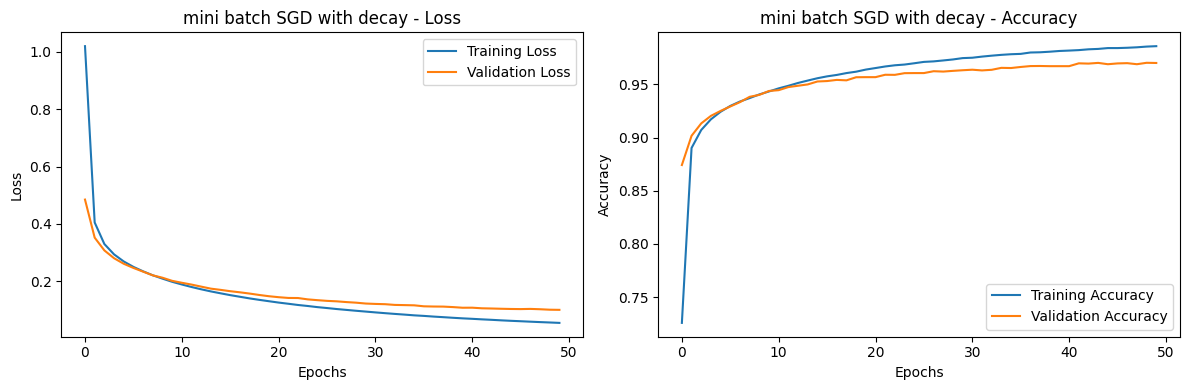

In [51]:
plot_learning_curves(history_sgd_mini_batch_decay, 'mini batch SGD with decay')

<h3> SGD with decay and momentum approach </h3>

In [84]:
sgd_decay_momentum_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,  activation='softmax')
])

In [85]:
sgd_decay_momentum_model.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-6, momentum=0.8),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [86]:
start_time = time.time()
history_sgd_decay_momentum = sgd_decay_momentum_model.fit(x_train, y_train, epochs=50, 
batch_size=1, validation_data=(x_val,y_val), shuffle=True)
end_time = time.time()
sgd_decay_momentum_training_time = end_time - start_time

print(f"Running time for sgd with decay and momentum: {sgd_decay_momentum_training_time } seconds")

Epoch 1/50
48000/48000 [==============================] - 140s 3ms/step - loss: 0.4903 - accuracy: 0.8740 - val_loss: 0.3477 - val_accuracy: 0.9215
Epoch 2/50
48000/48000 [==============================] - 148s 3ms/step - loss: 0.3655 - accuracy: 0.9153 - val_loss: 0.4330 - val_accuracy: 0.9152
Epoch 3/50
48000/48000 [==============================] - 153s 3ms/step - loss: 0.3167 - accuracy: 0.9280 - val_loss: 0.3457 - val_accuracy: 0.9283
Epoch 4/50
48000/48000 [==============================] - 139s 3ms/step - loss: 0.2963 - accuracy: 0.9349 - val_loss: 0.2966 - val_accuracy: 0.9421
Epoch 5/50
48000/48000 [==============================] - 140s 3ms/step - loss: 0.2697 - accuracy: 0.9420 - val_loss: 0.3239 - val_accuracy: 0.9344
Epoch 6/50
48000/48000 [==============================] - 140s 3ms/step - loss: 0.2567 - accuracy: 0.9448 - val_loss: 0.2610 - val_accuracy: 0.9486
Epoch 7/50
48000/48000 [==============================] - 141s 3ms/step - loss: 0.2181 - accuracy: 0.9516 - val_

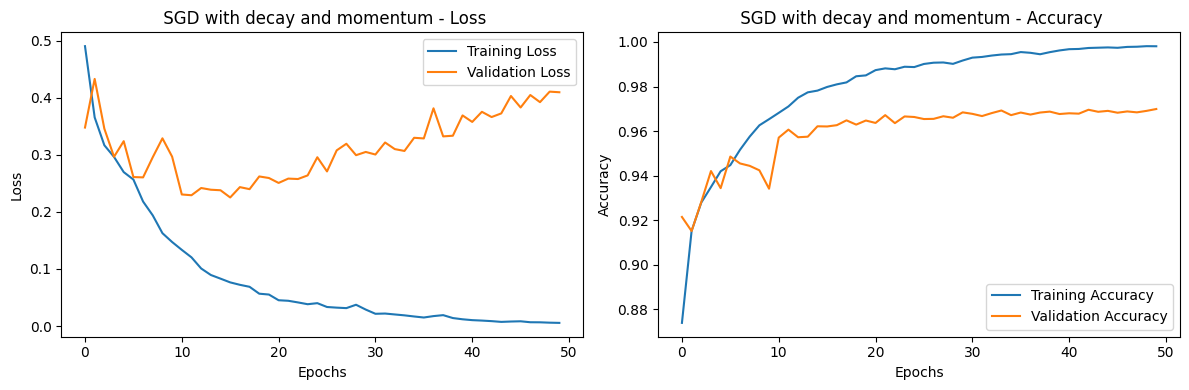

In [87]:
plot_learning_curves(history_sgd_decay_momentum, ' SGD with decay and momentum')

<h3> 6- Compare between SGD (lr=0.01), Adam (lr=0.001), and RmsProp (lr=0.001)
optimizers. </h3>

<h3>Train on Adam (lr=0.001) </h3>

In [56]:
adam_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,  activation='softmax')
])

In [57]:
adam_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [58]:
start_time = time.time()
history_adam = adam_model.fit(x_train, y_train, epochs=50, validation_data=(x_val,y_val))
end_time = time.time()
adam_model_training_time = end_time - start_time
print(f"Running time for adam: {adam_model_training_time } seconds")

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2674 - accuracy: 0.9229 - val_loss: 0.1401 - val_accuracy: 0.9594
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1096 - accuracy: 0.9673 - val_loss: 0.1117 - val_accuracy: 0.9646
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0787 - accuracy: 0.9755 - val_loss: 0.0996 - val_accuracy: 0.9707
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0590 - accuracy: 0.9808 - val_loss: 0.0809 - val_accuracy: 0.9756
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0830 - val_accuracy: 0.9759
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.0909 - val_accuracy: 0.9759
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.0922 - val_accuracy:

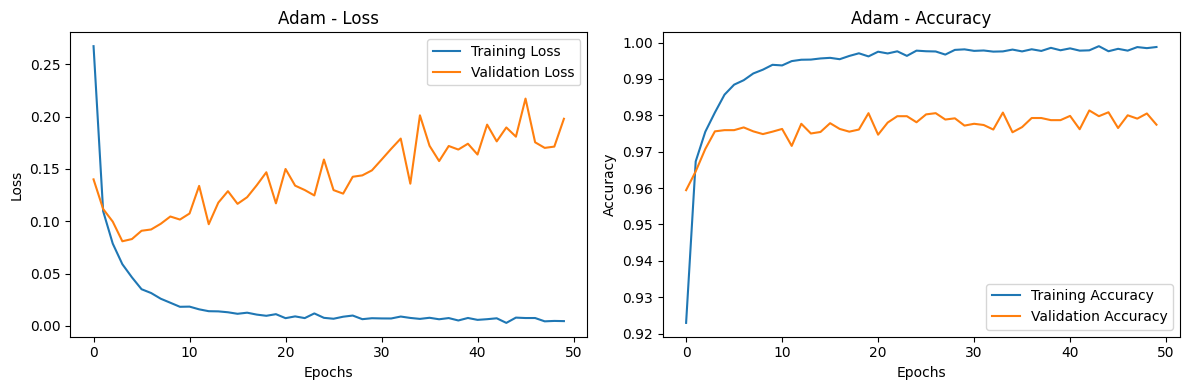

In [59]:
plot_learning_curves(history_adam, 'Adam')

<h3> Train on RmsProp (lr=0.001) </h3>

In [60]:
rmsProp_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,  activation='softmax')
])

In [61]:
rmsProp_model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [62]:
start_time = time.time()
history_rmsProp = rmsProp_model.fit(x_train, y_train, epochs=50, validation_data=(x_val,y_val))
end_time = time.time()
rmsProp_training_time = end_time - start_time
print(f"Running time for RmsProp : { rmsProp_training_time } seconds")

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2603 - accuracy: 0.9241 - val_loss: 0.1291 - val_accuracy: 0.9598
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1133 - accuracy: 0.9661 - val_loss: 0.1204 - val_accuracy: 0.9643
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0813 - accuracy: 0.9760 - val_loss: 0.0954 - val_accuracy: 0.9722
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0665 - accuracy: 0.9803 - val_loss: 0.0923 - val_accuracy: 0.9736
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0534 - accuracy: 0.9843 - val_loss: 0.0969 - val_accuracy: 0.9752
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0427 - accuracy: 0.9879 - val_loss: 0.1023 - val_accuracy: 0.9744
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0375 - accuracy: 0.9890 - val_loss: 0.0978 - val_accuracy:

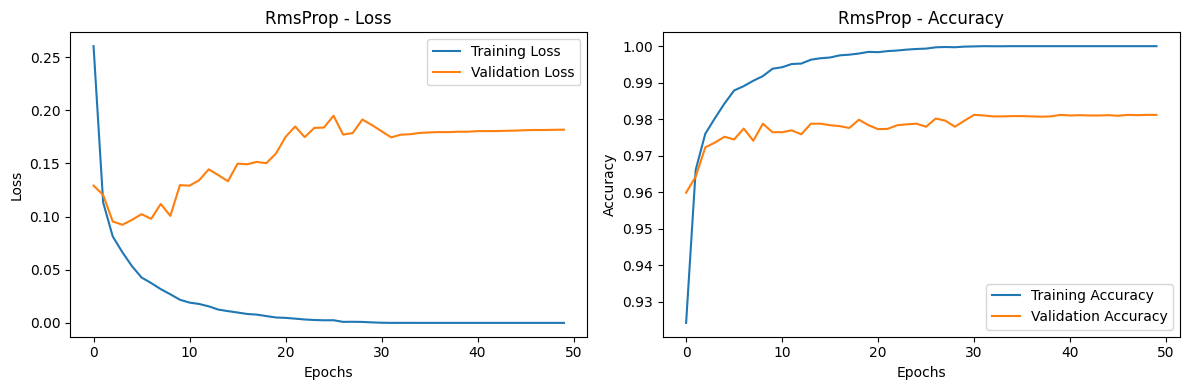

In [63]:
plot_learning_curves(history_rmsProp, 'RmsProp')

<h3> Print training times for all appraoches </h3>

In [88]:
training_times = {
    'mini_batch_sgd_model_training_time' : mini_batch_sgd_model_training_time,
    'batch_sgd_model_training_time' : batch_sgd_model_training_time,
    'sgd_model_training_time': sgd_model_training_time,
    'sgd_mini_batch_decay_model_training_time' : sgd_mini_batch_decay_model_training_time,
    'sgd_batch_decay_momentum_training_time' : sgd_batch_decay_momentum_training_time,
    'adam_model_training_time' : adam_model_training_time,
    'rmsProp_training_time' : rmsProp_training_time
    
    
}

In [93]:
for optimizer, time_taken in training_times.items():
    print(f'Training time for {optimizer}: {time_taken:.2f} seconds')

Training time for mini_batch_sgd_model_training_time: 184.05 seconds
Training time for batch_sgd_model_training_time: 338.01 seconds
Training time for sgd_model_training_time: 10324.14 seconds
Training time for sgd_mini_batch_decay_model_training_time: 160.93 seconds
Training time for sgd_batch_decay_momentum_training_time: 168.28 seconds
Training time for adam_model_training_time: 357.75 seconds
Training time for rmsProp_training_time: 346.49 seconds


<h3> Plot all models</h3>

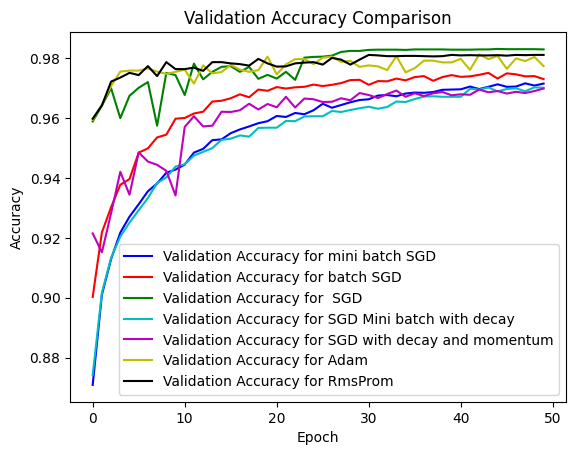

In [92]:
plt.plot(history_sgd_mini_batch.history['val_accuracy'], label='Validation Accuracy for mini batch SGD', color='b')
plt.plot(history_sgd_batch.history['val_accuracy'], label='Validation Accuracy for batch SGD ', color='r')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy for  SGD', color='g')
plt.plot(history_sgd_mini_batch_decay.history['val_accuracy'], label='Validation Accuracy for SGD Mini batch with decay', color='c')
plt.plot(history_sgd_decay_momentum.history['val_accuracy'], label='Validation Accuracy for SGD with decay and momentum', color='m')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy for Adam', color='y')
plt.plot(history_rmsProp.history['val_accuracy'], label='Validation Accuracy for RmsProm', color='k')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()


<h3> save all models, so I can compare between them later and choose the best one </h3>

In [97]:
models = {
    'mini_batch_sgd_model':mini_batch_sgd_model,
    'batch_sgd_model' :mini_batch_sgd_model,
    'sgd_model': sgd_model,
    'mini_batch_sgd_decay_model' :mini_batch_sgd_model,
    'sgd_decay_momentum_model' :sgd_decay_momentum_model,
    'adam_model' :adam_model,
    'rmsProp_model' :rmsProp_model
    
    
}

In [98]:
for approach, model in models.items():
    model.save(f'{approach}.keras')
    

<h3> 7- Import the chosen model (SGD) , and make predictions on some samples from the test set.</h3>

In [99]:
# import the model
model = tf.keras.models.load_model('sgd_model.keras')

1/1 [==============================] - 0s 65ms/step


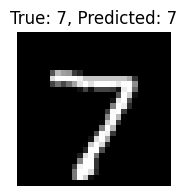

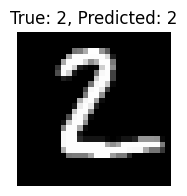

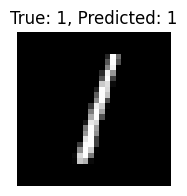

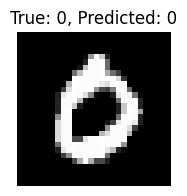

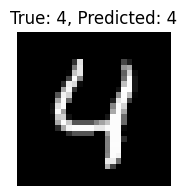

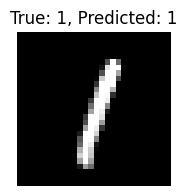

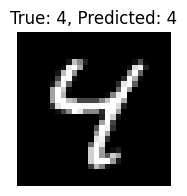

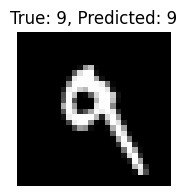

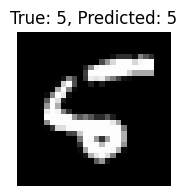

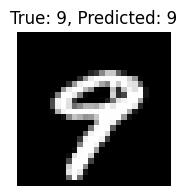

In [100]:
#  subset of samples
subset_indices = range(10)
subset_x_test_flat = x_test[subset_indices].reshape(-1, 784)
subset_y_test = y_test[subset_indices]

# Make predictions 
subset_predictions = model.predict(subset_x_test_flat)

# Visualize the subset predictions
for i in range(len(subset_indices)):
    plt.figure(figsize=(2, 2))
    
    # Reshape the flattened data back to (28, 28) for visualization
    subset_x_test_reshaped = subset_x_test_flat[i].reshape(28, 28)
    
    plt.imshow(subset_x_test_reshaped, cmap='gray')
    plt.title(f"True: {subset_y_test[i]}, Predicted: {np.argmax(subset_predictions[i])}")
    plt.axis('off')
    plt.show()